# Part 3: Machine learning

## Prediction of the prices for adults 

In [110]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

We are going here to import the data that we have collected from de webscrapping done previously.

In [111]:
df=pd.read_excel("webscraping.xlsx")
df.head()

,Name,Type,City,Adults,Children,Latitude,Longitude
0,Abbaye de Maredsous et Le Saint-Joseph,Abbeys and religious monuments,Denée,0.0,0.0,47.378864,-0.607726
1,Abbaye d'Aulne,Abbeys and religious monuments,Gozée,5.0,1.0,50.333228,4.351559
2,Hôpital Notre-Dame à la Rose,Abbeys and religious monuments,Lessines,13.0,8.0,50.712304,3.830113
3,Musée de la Vie wallonne,Abbeys and religious monuments,Liège,7.0,5.0,50.645094,5.573611
4,Trésor de la Collégiale Ste-Waudru,Abbeys and religious monuments,Mons,4.0,2.0,50.454957,3.951958


In [112]:
print(df.dtypes)

Name          object
Type          object
City          object
Adults       float64
Children     float64
Latitude     float64
Longitude    float64
dtype: object


In order to do a regression, we should see if the prices of adults or children are correlated. If there are, we should include prices for children in the regression for the prices of adults and inversely.

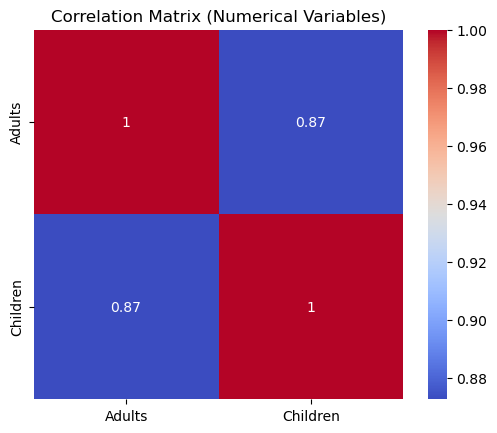

In [113]:
Num_cols = ['Adults', 'Children']
corr_matrix = df[Num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numerical Variables)')
plt.show()

We see that there is a correlation of 0.87 between the prices of adults and children. This correlation of 0.87 suggests a strong positive relationship between the two variables and we should therefore include this in the following regression.

Let's thus define the  first variables of the first regression on the adults prices. We will here not include the variable of the prices of children. The prices of adults will here only depends on the city and the type of attractions.

In [114]:
X = df[['Type', 'City']]
y = df['Adults']

In [115]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [119]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
combinations = list(itertools.product(unique_types, unique_cities))
predict_df_adults = pd.DataFrame(combinations, columns=['Type', 'City'])
predict_data = ct.transform(predict_df_adults)
predicted_prices = model.predict(predict_data)
predict_df_adults['Predicted Adults Prices with model 1'] = predicted_prices

predict_df_adults1 = predict_df_adults[['City', 'Type', 'Predicted Adults Prices with model 1']]

print(predict_df_adults1)

               City                            Type  \
0             Denée  Abbeys and religious monuments   
1            Gozée   Abbeys and religious monuments   
2          Lessines  Abbeys and religious monuments   
3             Liège  Abbeys and religious monuments   
4              Mons  Abbeys and religious monuments   
...             ...                             ...   
2701  Vieux-Genappe                          UNESCO   
2702       Waterloo                          UNESCO   
2703           Coo                           UNESCO   
2704       Dochamps                          UNESCO   
2705     Houffalize                          UNESCO   

      Predicted Adults Prices with model 1  
0                                -0.418550  
1                                 5.000050  
2                                13.000061  
3                                 5.467915  
4                                 6.787546  
...                                    ...  
2701                    

We have then predicted the prices for the adults based on the city and the type of activity. But is this model a good fitting and does it gives good predictions ? We will then do some tests to assess, or not, of the results of the model.

In [120]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 2.6178982513545743
Test RMSE: 7.148754182537648
R-squared: 0.3383790511214788


The R-squared value is a measure of how well the regression model fits the data. Here, the R-squared value of 0.33 indicates that approximately 33% of the variance in the dependent variable is explained by the independent variables. There is so a portion of the model which remains unexplained. Then, the RMSE measures the average prediction error of a regression model. Here, the train RMSE of 2.61 indicates that, on average, the predictions of the model on the training data are off by approximately 2.61 units. The test RMSE of 7.14 indicates that, on average, the predictions on the test data are off by approximately 7.14 units. A lower RMSE value indicates better predictive performance, so the train RMSE being lower than the test RMSE suggests that the model may be slightly overfitting the training data and not generalizing as well to the test data. Overall, the performance of the model seems to be moderate.

Here, we can predict one price for a precise type of activity and a precise city. This could be useful if we don't want to search in all the predictions.

In [121]:
new_data = [['Art', 'Bruxelles']]
new_data = ct.transform(new_data)
predicted_price = model.predict(new_data)
print("Predicted Price for Adults:", predicted_price)

Predicted Price for Adults: [9.53991914]


C:\Users\flori\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


We will then do a scatter plot of predicted price for adults versus actual price for adults. This can provide insights into the performance and accuracy of the regression model.

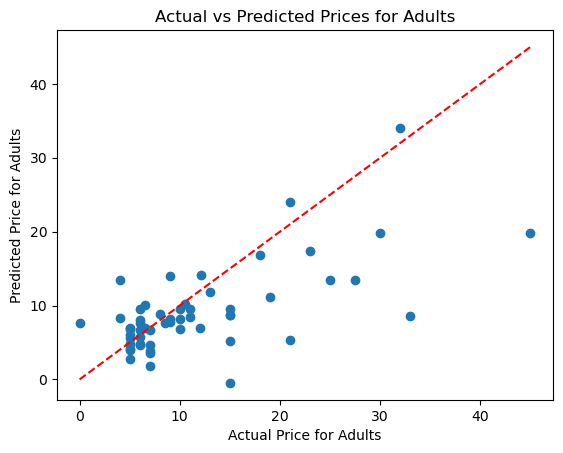

In [122]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price for Adults')
plt.ylabel('Predicted Price for Adults')
plt.title('Actual vs Predicted Prices for Adults')
plt.show()

We can see that some points are closer to the diagonal line than other. The points close to this diagonal indicates that the model's predictions are close to the actual values. However, we also have points with a significant deviation from the diagonal line, it shows the error that we have with some prediction of the prices.

Let's now do the second regression. We will add here the prices of children in the regression in order to have more information in our model. We add the prices of children because we have seen that there is a moderate positive relationship between the two variables. Let's see the changes brought by this addition of variable in the model.

In [123]:
X = df[['Type', 'City', 'Children']]
y = df['Adults']

In [124]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [127]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [128]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
unique_children = df['Children'].unique()

combinations = list(itertools.product(unique_types, unique_cities, unique_children))
predict_df_adults = pd.DataFrame(combinations, columns=['Type', 'City', 'Children'])
predict_data = ct.transform(predict_df_adults)

predicted_prices = model.predict(predict_data)
predict_df_adults['Predicted Adults Prices with model 2'] = predicted_prices

predict_df_adults2 = predict_df_adults[['City', 'Type', 'Children', 'Predicted Adults Prices with model 2']]

print(predict_df_adults2)

              City                            Type  Children  \
0            Denée  Abbeys and religious monuments      0.00   
1            Denée  Abbeys and religious monuments      1.00   
2            Denée  Abbeys and religious monuments      8.00   
3            Denée  Abbeys and religious monuments      5.00   
4            Denée  Abbeys and religious monuments      2.00   
...            ...                             ...       ...   
119059  Houffalize                          UNESCO     12.50   
119060  Houffalize                          UNESCO      9.75   
119061  Houffalize                          UNESCO      4.50   
119062  Houffalize                          UNESCO     14.50   
119063  Houffalize                          UNESCO     45.00   

        Predicted Adults Prices with model 2  
0                                  -0.160712  
1                                   0.468684  
2                                   4.874454  
3                                   2.98626

In [129]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 1.918940091417635
Test RMSE: 4.401161984408371
R-squared: 0.7492255846529967


From these test results, it appears that the model have reasonable performance. It captures 74.92% of the variance in the target variable. However, we can notice a difference between the train and the test RMSE values. It could suggests potential overfitting or lack of generalization to unseen data. Further analysis and evaluation may be required to assess the model's performance and make any necessary improvements.

We will therefore make a decision tree regression in order to see if there is some improvements for the model.

In [130]:
X = df[['Type', 'City', 'Children']]
y = df['Adults']

In [131]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [134]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [135]:
unique_types = df['Type'].unique()
unique_cities = df['City'].unique()
unique_children = df['Children'].unique()

combinations = list(itertools.product(unique_types, unique_cities, unique_children))
predict_df_adults = pd.DataFrame(combinations, columns=['Type', 'City', 'Children'])
predict_data = ct.transform(predict_df_adults)

predicted_prices = model.predict(predict_data)
predict_df_adults['Predicted Adults Prices with model 3'] = predicted_prices

predict_df_adults3 = predict_df_adults[['City', 'Type', 'Children', 'Predicted Adults Prices with model 3']]

print(predict_df_adults3)

              City                            Type  Children  \
0            Denée  Abbeys and religious monuments      0.00   
1            Denée  Abbeys and religious monuments      1.00   
2            Denée  Abbeys and religious monuments      8.00   
3            Denée  Abbeys and religious monuments      5.00   
4            Denée  Abbeys and religious monuments      2.00   
...            ...                             ...       ...   
119059  Houffalize                          UNESCO     12.50   
119060  Houffalize                          UNESCO      9.75   
119061  Houffalize                          UNESCO      4.50   
119062  Houffalize                          UNESCO     14.50   
119063  Houffalize                          UNESCO     45.00   

        Predicted Adults Prices with model 3  
0                                        0.0  
1                                        0.0  
2                                       12.0  
3                                        7.

In [137]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 0.7863658258858991
Test RMSE: 4.033761785407529
R-squared: 0.7893463371296957


Overall, the model seems to have reasonable performance, capturing about 78.93% of the variance in the target variable. However, there is a noticeable difference between the train and test RMSE values, suggesting potential overfitting or lack of generalization to unseen data. This model is quite the same as the linear one made above. The addition of data and maybe the testing of other models could provide some more relevant predictions.

In summary, the second model outperforms the first model in terms of train RMSE, test RMSE, and R-squared. It has lower prediction errors on both the training and test data, as well as a higher ability to explain the variance in the target variable. Therefore, the second model is likely to be a better choice for predicting the target variable based on the given results.
However, we could try in further research to add more data to the dataframe or to test other model to have better predictions.

In the following code , we will make an excel table with the predictions of the linear regression and the predictions of the decision tree regression model.

In [138]:
predict_df = predict_df_adults2.merge(predict_df_adults3, on=['Type', 'City', 'Children'])
predict_df.sort_values(by='City', inplace=True)
print(predict_df)

                  City                                    Type  Children  \
42153  Alle-sur-Semois                                   Caves       1.0   
20537  Alle-sur-Semois                             Archaeology      22.0   
20536  Alle-sur-Semois                             Archaeology      25.5   
20535  Alle-sur-Semois                             Archaeology      20.0   
20534  Alle-sur-Semois                             Archaeology       5.5   
...                ...                                     ...       ...   
93604           Wéris   Recreational, nautical and water parks       6.0   
93603           Wéris   Recreational, nautical and water parks      21.0   
93602           Wéris   Recreational, nautical and water parks      33.0   
93600           Wéris   Recreational, nautical and water parks       7.0   
23263           Wéris                                      Art      20.0   

       Predicted Adults Prices with model 2  \
42153                              5.555

In [139]:
predict_df

,City,Type,Children,Predicted Adults Prices with model 2,Predicted Adults Prices with model 3
42153,Alle-sur-Semois,Caves,1.0,5.555898,5.0
20537,Alle-sur-Semois,Archaeology,22.0,14.247660,27.0
20536,Alle-sur-Semois,Archaeology,25.5,16.450545,27.0
20535,Alle-sur-Semois,Archaeology,20.0,12.988869,27.0
20534,Alle-sur-Semois,Archaeology,5.5,3.862632,10.0
...,...,...,...,...,...
93604,Wéris,"Recreational, nautical and water parks",6.0,11.959532,8.0
93603,Wéris,"Recreational, nautical and water parks",21.0,21.400467,27.0
93602,Wéris,"Recreational, nautical and water parks",33.0,28.953215,39.0
93600,Wéris,"Recreational, nautical and water parks",7.0,12.588928,10.0


In [140]:
df2=predict_df

In [141]:
df2.to_excel('predict_df.xlsx', index=False)